In [78]:
import os
import sys
import tempfile

import numpy as np
from rdkit import RDPaths, Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem.rdmolfiles import MolToSmiles, MolFromSmiles

ifg_path = os.path.join(RDPaths.RDContribDir, 'IFG')
sys.path.append(ifg_path)
import ifg

output_path = os.environ["FIGURES"] + "/04_diversity/" 
os.makedirs(output_path, exist_ok=True)

In [97]:
from evomol.evaluation_entropy import extract_checkmol
from evomol.molgraphops.molgraph import MolGraph

def extract_ifg(smi):
    curr_ifgs = ifg.identify_functional_groups(MolFromSmiles(smi))
    return list(set([curr_ifg[2] for curr_ifg in curr_ifgs]))

def extract_gen_scaff(smi):
    return MolToSmiles(MurckoScaffold.MakeScaffoldGeneric(MolFromSmiles(smi)))

def extract_scaff(smi):
    return MurckoScaffold.MurckoScaffoldSmiles(smi)

def extract_chkmol(smi):
    return extract_checkmol(MolGraph(MolFromSmiles(smi)))

In [41]:
smi = "CC1=CC=C(C=C1)C2=CC(=NN2C3=CC=C(C=C3)S(=O)(=O)N)C(F)(F)F"

In [42]:
ifgs = extract_ifg(smi)

In [43]:
gen_scaff = extract_gen_scaff(smi)

In [44]:
scaff = extract_scaff(smi)

In [98]:
extract_chkmol(smi)

['halogen derivative',
 'sulfonamide',
 'aromatic compound',
 'heterocyclic compound']

In [61]:
all_smiles = [smi, scaff, gen_scaff] + ifgs

In [62]:
from rdkit.Chem.Draw import MolsToGridImage

In [63]:
print(all_smiles)

['CC1=CC=C(C=C1)C2=CC(=NN2C3=CC=C(C=C3)S(=O)(=O)N)C(F)(F)F', 'c1ccc(-c2ccnn2-c2ccccc2)cc1', 'CC1CCC(C2CC(C(C)(C)C)CC2C2CCC(C(C)(C)C)CC2)CC1', 'c-n(c)nc', 'CF', 'cS(N)(=O)=O']


In [64]:
all_smiles[3] = "CN(C)N=C"
all_smiles[5] = "CS(N)(=O)=O"

In [65]:
mols = [MolFromSmiles(smi) for smi in all_smiles]

In [73]:
legends = ["Celecoxib", "Scaffold", "Scaffold generique", "IFG (1)", "IFG (2)", "IFG (3)"]

In [95]:
img = MolsToGridImage(mols, legends=legends, subImgSize=(250, 250))

In [96]:
import io
from PIL import Image
from os.path import join

buf = io.BytesIO()
buf.write(img.data)
buf.seek(0)
img = Image.open(buf)
        
img.save(join(output_path, "mols.png"))


In [83]:
from rdkit.Chem import Kekulize

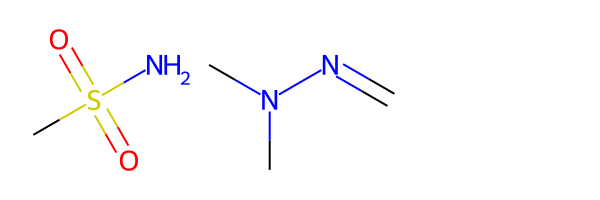

In [56]:
MolsToGridImage([MolFromSmiles("CS(N)(=O)=O"), MolFromSmiles("CN(C)N=C")])